In [9]:
from dataloader import *

X, y = load_image_vectors("./enrico_image_data.pkl")

--- Load raw image vectors success ---
X: (1458, 3072)
y[reference labels]: (1458,)


In [10]:
# use kmeans to cluster the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=0).fit(X)
# predict the cluster for each data point
y_pred = kmeans.predict(X)
print(y_pred)

[ 4 19  5 ...  4  5  5]


In [15]:
# build mapping from cluster id to real id
cluster_to_real = {}
for i in range(len(y_pred)):
    if y_pred[i] not in cluster_to_real:
        cluster_to_real[y_pred[i]] = y[i]

# transform y_pred to real id
for i in range(len(y_pred)):
    y_pred[i] = cluster_to_real[y_pred[i]]

# calculate the accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, y_pred)

# calculate the precision and recall
from sklearn.metrics import precision_recall_fscore_support
# generate an list from 0-19
label = [i for i in range(20)]
prec, recall, fscore, _ = precision_recall_fscore_support(y, y_pred, average='macro', labels=label, zero_division=0)

# remain 4 digits in print
print("acc: {:.4f}, prec: {:.4f}, recall: {:.4f}, fscore: {:.4f}".format(acc, prec, recall, fscore))

# calculate Silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_pred)
print("Average Sihouette: {:.4f}".format(silhouette_avg))

# calculate Normalized Mutual Information (NMI)
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(y, y_pred)
print("NMI: {:.4f}".format(nmi))

acc: 0.1433, prec: 0.1835, recall: 0.1437, fscore: 0.1506
Average Sihouette: 0.0515
NMI: 0.1462


d:\Install\Anaconda\envs\ml-labs\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Install\Anaconda\envs\ml-labs\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


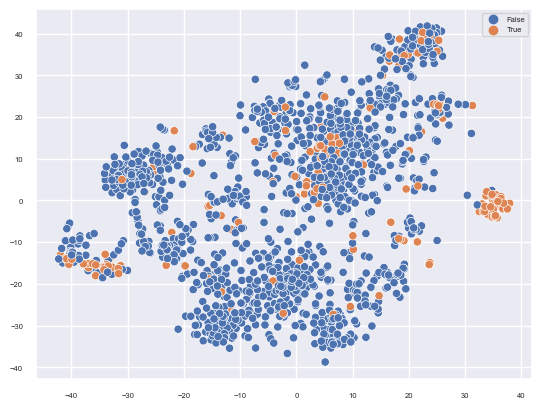

In [21]:
# use tsne to visualize the data
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

# plot the result
# set high dpi
plt.figure(dpi=100)
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=(y_pred==y))
plt.show()

In [1]:
from tqdm import tqdm
# use DBSCAN to cluster the data
from sklearn.cluster import DBSCAN

# for X, do a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# grid search for the best eps and min_samples
eps_step = 0.025
sample_step = 1
closest_estimate_classes = 0
# generate a list of eps and min_samples
eps_list = [i * eps_step for i in range(1, 10)]
sample_list = [i * sample_step for i in range(1, 20)]
for eps in tqdm(eps_list):
    for sample in sample_list:
        dbscan = DBSCAN(eps=eps, min_samples=sample).fit(X_pca)
        # get class number
        class_num = len(set(dbscan.labels_))
        # if the current class_number is closer to 20, print the eps and min_samples
        if abs(20 - class_num) < abs(20 - closest_estimate_classes) or class_num == 20:
            closest_estimate_classes = class_num
            print("eps: {}, min_samples: {}, class_num: {}".format(eps, sample, class_num))

NameError: name 'X' is not defined

[0 0 0 ... 0 0 0]
Average Sihouette: 0.1176


d:\Install\Anaconda\envs\ml-labs\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Install\Anaconda\envs\ml-labs\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


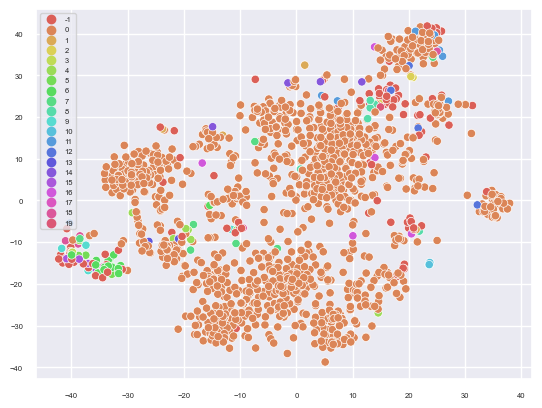

In [23]:
# get a dbscan model with the best eps and min_samples
dbscan = DBSCAN(eps=0.025, min_samples=3).fit(X_pca)
# predict the cluster for each data point
y_pred_dbscan = dbscan.labels_
print(y_pred_dbscan)

silhouette_avg = silhouette_score(X, y_pred_dbscan)
print("Average Sihouette: {:.4f}".format(silhouette_avg))

# use tsne to visualize the result
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# get the tsne result
tsne_dbscan = TSNE(n_components=2, random_state=0)
X_tsne = tsne_dbscan.fit_transform(X)

# plot the tsne result
sns.set(font_scale=0.5)
# set high dpi
plt.figure(dpi=100)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_pred_dbscan, legend='full', palette=sns.color_palette("hls", len(set(y_pred_dbscan))))
#sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=(y==y_pred_dbscan))
plt.show()